In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

from keras.datasets import mnist

In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [4]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

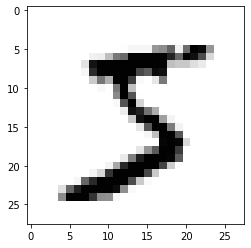

In [7]:
plt.imshow(train_x[0], cmap='Greys')
plt.show()
plt.close()

In [10]:
for x in train_x[0]:
    for i in x:
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [16]:
train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)
train_x.shape, test_x.shape 

((60000, 784), (10000, 784))

In [17]:
train_x = train_x.astype('float64')
test_x = test_x.astype('float64')

train_x = train_x / 255
test_x = test_x / 255

In [18]:
print("y : %d" %(train_y[0]))

y : 5


In [20]:
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

In [21]:
print(train_y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
model = Sequential()

model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation= 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [24]:
dir_name = '13_cnn_dir'

if not os.path.exists(dir_name):
    os.mkdir(dir_name)
    
model_path = './13_cnn_dir/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath = model_path,
                             monitor = 'val_loss', 
                             save_best_only=True,
                             verbose = 0)


early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        verbose=0,
                                        patience=10)

In [28]:
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs = 30, 
                    batch_size = 200, 
                    callbacks=[checkpoint, early_stopping_callback])

Epoch 1/30
300/300 [==============================] - 3s 11ms/step - loss: 0.4837 - accuracy: 0.8771 - val_loss: 53.7896 - val_accuracy: 0.7681
Epoch 2/30
300/300 [==============================] - 4s 12ms/step - loss: 0.3995 - accuracy: 0.8920 - val_loss: 54.4193 - val_accuracy: 0.7866
Epoch 3/30
300/300 [==============================] - 4s 13ms/step - loss: 0.3573 - accuracy: 0.9004 - val_loss: 53.6494 - val_accuracy: 0.7992
Epoch 4/30
300/300 [==============================] - 4s 12ms/step - loss: 0.3317 - accuracy: 0.9059 - val_loss: 52.2353 - val_accuracy: 0.8097
Epoch 5/30
300/300 [==============================] - 4s 12ms/step - loss: 0.3138 - accuracy: 0.9109 - val_loss: 49.5834 - val_accuracy: 0.8244
Epoch 6/30
300/300 [==============================] - 4s 13ms/step - loss: 0.3000 - accuracy: 0.9133 - val_loss: 48.5691 - val_accuracy: 0.8324
Epoch 7/30
300/300 [==============================] - 4s 14ms/step - loss: 0.2888 - accuracy: 0.9174 - val_loss: 46.1748 - val_accuracy:

In [29]:
print("test accuracy : ", model.evaluate(test_x, test_y)[1])

313/313 [==============================] - 1s 2ms/step - loss: 18.8856 - accuracy: 0.9376
test accuracy :  0.9376000165939331


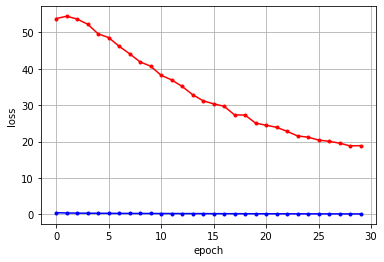

In [30]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label = 'testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'trainset_loss')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.close()